In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [4]:
m = x_train.shape[0]
m

2

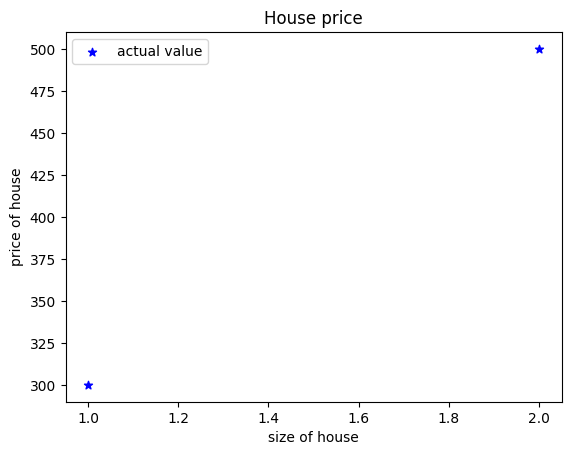

In [16]:
plt.scatter(x_train, y_train, marker = '*', color = 'b', label = 'actual value')
plt.title("House price")
plt.xlabel("size of house")
plt.ylabel("price of house")
plt.legend()
plt.show()

In [5]:
def cost_function(x_train, y_train, w, b) :
  m = x_train.shape[0]
  cost_sum = 0

  for i in range(m) :
    fwb = w * x_train[i] + b
    cost = (fwb - y_train[i]) ** 2
    cost_sum = cost_sum + cost
  total_cost = (1 / (m * 2)) * cost_sum

  return total_cost

In [6]:
# This function calculates the gradients (derivatives) of the cost function with respect to w and b
# These gradients tell us how much we need to adjust w and b to reduce the cost.
def compute_gradient(x_train, y_train, w, b) :
  m = x_train.shape[0]
  dj_dw = 0 # Gradient of J with respect to w
  dj_db = 0 # Gradient of J with respect to b

  for i in range(m) :
    fwb = w * x_train[i] + b  # Compute prediction f_wb(x) = w * x + b
    dj_dw_i = (fwb - y_train[i]) * x_train[i]
    dj_db_i = (fwb - y_train[i])

    dj_dw = dj_dw + dj_dw_i  # Accumulate sum for w
    dj_db = dj_db + dj_db_i  # Accumulate sum for b

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db


In [7]:
#This function uses the gradients from compute_gradient to update w and 𝑏 iteratively, so they move towards their optimal values.
def gradient_descent(x_train, y_train, w_initial, b_initial, alpha, num_iters, cost_function, compute_gradient) :

  # Gradient function (compute_gradient) to find how much w and b should be adjusted.
  # Cost function (cost_function) to compute the error
  # alpha: This is the learning rate, which controls how big the steps are during the descent.
  # num_iters: This is the number of iterations (steps) the algorithm will take to update  w and b
  # w_initial and b_initial: These are the starting values for the parameters w and b

  J_history = [] # Stores cost function values at each iteration . helps us track how the cost decreases over time.
  p_history = [] # Stores (w, b) values at each iteration
  b = b_initial
  w = w_initial

  for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)  # Get gradients

        # Update Parameters w and b using descent gradiant formula to reduce the cost j(w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x_train, y_train, w, b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0: # print every 100 iterations
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
  return w, b, J_history, p_history #return w and J,w history for graphing

In [8]:
# initialize parameters
w_initial = 0
b_initial = 0
# some gradient descent settings
num_iters = 10000
alpha = 0.01
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, num_iters, cost_function, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

print(f"value of w : {w_final}")
print(f"value of b : {b_final}")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


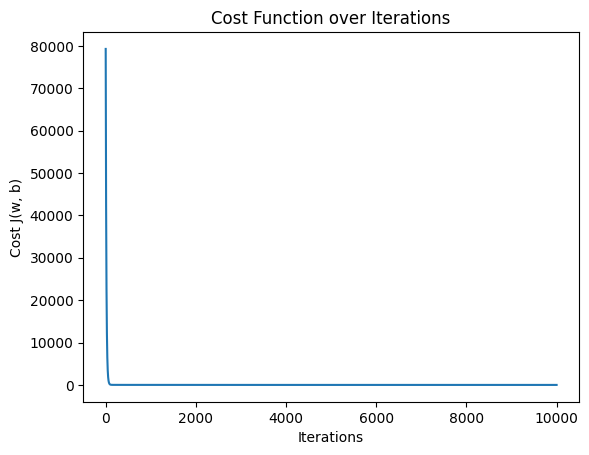

In [9]:
# The cost function J(w,b) should decrease and stabilize.
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost J(w, b)')
plt.title('Cost Function over Iterations')
plt.show()

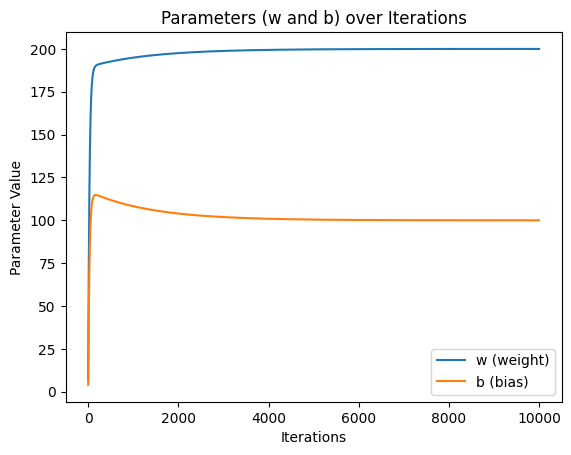

In [10]:
# check w and b converge  : The parameters w and b should stabilize (stop changing significantly) as the algorithm progresses.
w_history = [p[0] for p in p_hist] # Value of w at iteration i
b_history = [p[1] for p in p_hist] # Value of b at iteration i

plt.plot(w_history, label='w (weight)')
plt.plot(b_history, label='b (bias)')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.title('Parameters (w and b) over Iterations')
plt.legend()
plt.show()

In [11]:
# Verify the Final Model Predictions

# Compute predictions
y_pred = w_final * x_train + b_final

# Compare predictions with actual values
for i in range(len(x_train)):
    print(f"x = {x_train[i]}, y_actual = {y_train[i]}, y_pred = {y_pred[i]}")

x = 1.0, y_actual = 300.0, y_pred = 300.00441847867967
x = 2.0, y_actual = 500.0, y_pred = 499.9972692299973


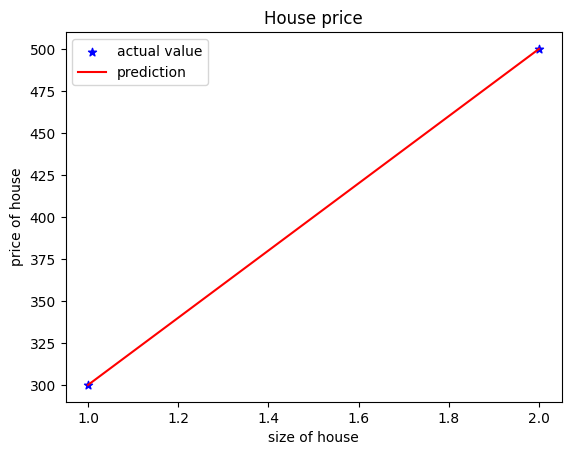

In [15]:

plt.scatter(x_train, y_train, marker = '*', color = 'b', label = 'actual value')
plt.plot(x_train, y_pred, color = 'r', label = 'prediction')
plt.title("House price")
plt.xlabel("size of house")
plt.ylabel("price of house")
plt.legend()
plt.show()

In [24]:
def predict(x_new, w, b):
    return w * x_new + b

# Example usage:
x_new = 1.0  # Replace with any new input
y_pred = predict(x_new, w_final, b_final)
print(f"Predicted value for x = {x_new}: {y_pred:.4f}")


Predicted value for x = 1.0: 300.0044
